# Titanic - Machine Learning from Disaster

# Contents
## [1.First Look](#first)
## [2.Understanding The Data](#understand)
## [3.Preprocessing](#preprocess)
## [4.Modeling](#model)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Directory Paths

In [2]:
base_dir = "../input/titanic/"
train_dir = base_dir + "train.csv"
test_dir = base_dir + "test.csv"
gender_dir = base_dir + "gender_submission.csv"

## 1.First Look<a id="first"></a>

### Reading Data

In [3]:
df = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)
gender = pd.read_csv(gender_dir)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
print(df.shape)
print(test.shape)
print(gender.shape)

(891, 12)
(418, 11)
(418, 2)


### Missing Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


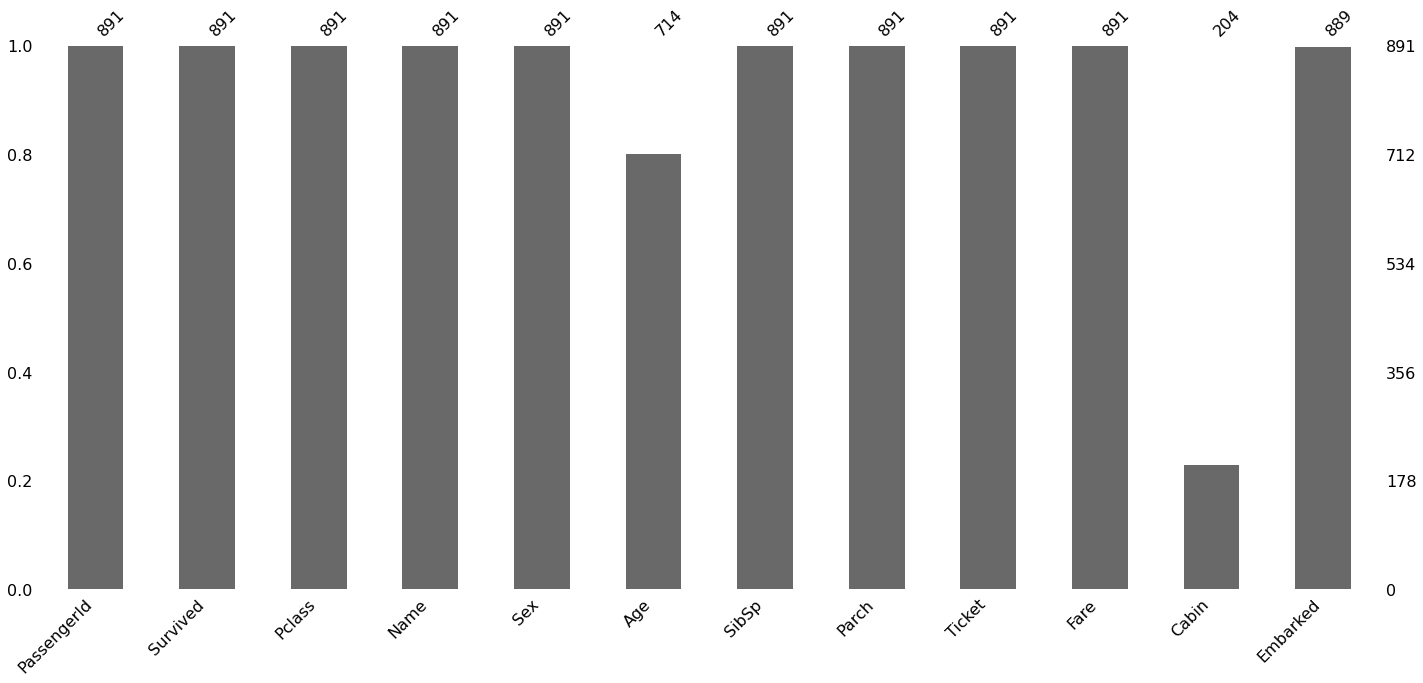

In [10]:
msno.bar(df);

## 2.Understanding The Data<a id="understand"></a>

In [11]:
def value_counts(column, plot):
    
    print(f"\nValue Counts:\n{df[column].value_counts()}")
    print(f"\nPercentage:\n{df[column].value_counts()/df[column].count()*100}")    
    
    if plot == "pie":
        print(f"\nPie Plot:\n{df[column].value_counts().plot.pie()}")
    elif plot == "bar":
        print(f"\nBar Plot:\n{df[column].value_counts().plot.bar()}")
    elif plot == "barh":
        print(f"\nBarh Plot:\n{df[column].value_counts().plot.barh()}")

### Survived
* 0: Dead
* 1: Survived

In [12]:
# Value counts
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
# Percentage
df.Survived.value_counts()/df.Survived.count()*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

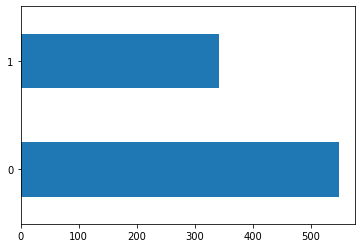

In [14]:
# Barh plor
df.Survived.value_counts().plot.barh();

### Pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower


Value Counts:
3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage:
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

Bar Plot:
AxesSubplot(0.125,0.125;0.775x0.755)


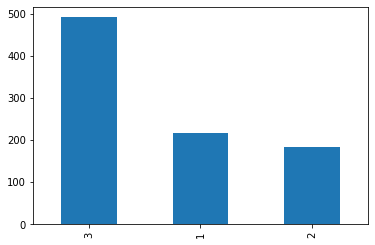

In [15]:
value_counts("Pclass", "bar")

### Sex:
* Male
* Female


Value Counts:
male      577
female    314
Name: Sex, dtype: int64

Percentage:
male      64.758698
female    35.241302
Name: Sex, dtype: float64

Pie Plot:
AxesSubplot(0.260833,0.125;0.503333x0.755)


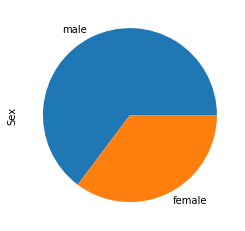

In [16]:
value_counts("Sex", "pie")

### Age:
*Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5*

In [17]:
df[["Age"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


*We can group the age for better understanding*

In [18]:
age = pd.cut(df.Age, [0,18,28,38,80])

In [19]:
age.value_counts()

(18, 28]    223
(38, 80]    177
(28, 38]    175
(0, 18]     139
Name: Age, dtype: int64

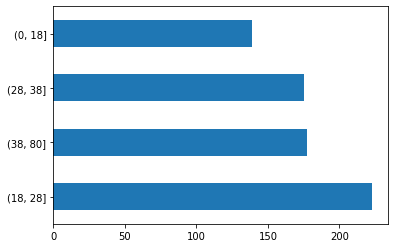

In [20]:
age.value_counts().plot.barh();

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


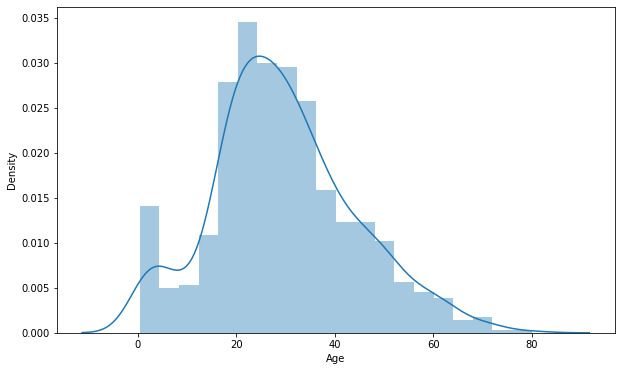

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df.Age);

### SibSp: 
*The dataset defines family relations in this way...*
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)


Value Counts:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Percentage:
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

Bar Plot:
AxesSubplot(0.125,0.125;0.775x0.755)


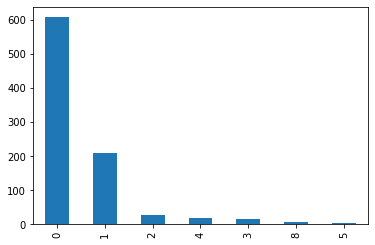

In [22]:
value_counts("SibSp", "bar")

### Parch: 
*The dataset defines family relations in this way...*
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson (Some children travelled only with a nanny, therefore parch=0 for them)


Value Counts:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Percentage:
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

Bar Plot:
AxesSubplot(0.125,0.125;0.775x0.755)


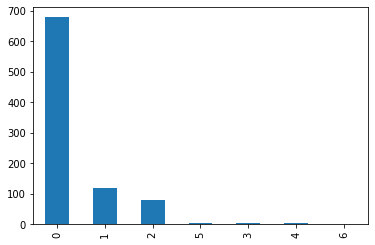

In [23]:
value_counts("Parch", "bar")

### Fare

In [24]:
df[["Fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


*We can group the fare like age*

In [25]:
fare = pd.cut(df.Fare, [0,8,15,31,513])

In [26]:
fare.value_counts()

(0, 8]       226
(31, 513]    222
(8, 15]      217
(15, 31]     211
Name: Fare, dtype: int64

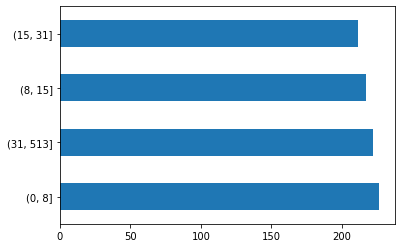

In [27]:
fare.value_counts().plot.barh();

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


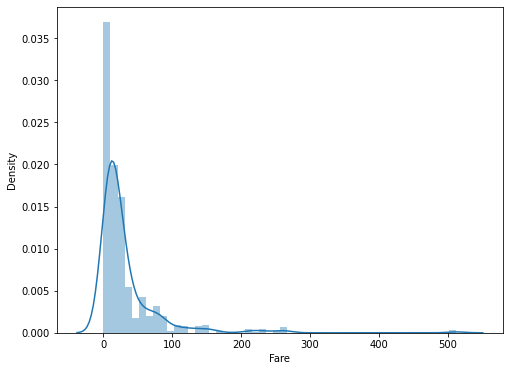

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(df.Fare);

### Embarked:
*Port of Embarkation*
* C = Cherbourg
* Q = Queenstown
* S = Southampton


Value Counts:
S    644
C    168
Q     77
Name: Embarked, dtype: int64

Percentage:
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

Pie Plot:
AxesSubplot(0.260833,0.125;0.503333x0.755)


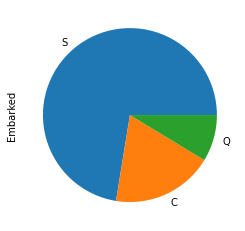

In [29]:
value_counts("Embarked", "pie")

### Data Visualization

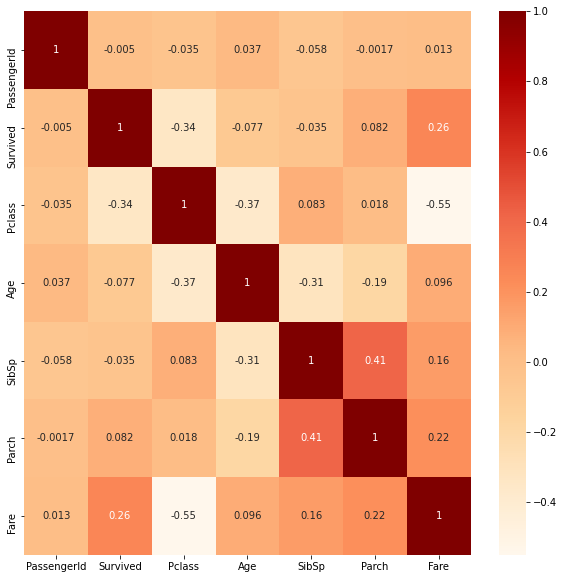

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="OrRd");

*After heatmap, we should look:*
* Pclass - Survived
* Fare - Survived
* Age - Pclass
* Fare - Pclass
* SibSp - Age
* Parch - SibSp
* Fare - Parch

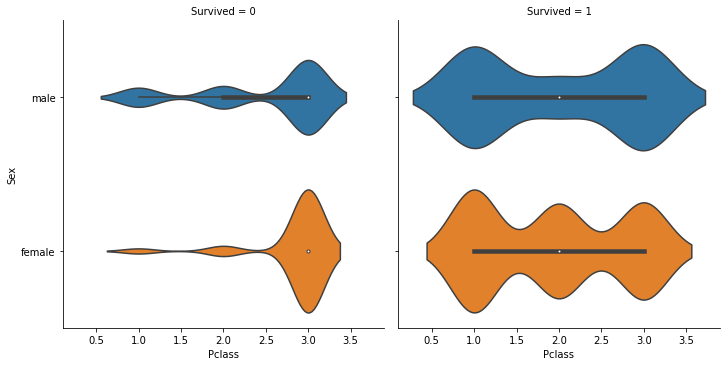

In [31]:
sns.catplot(x="Pclass", y="Sex", kind="violin", col="Survived", data=df);

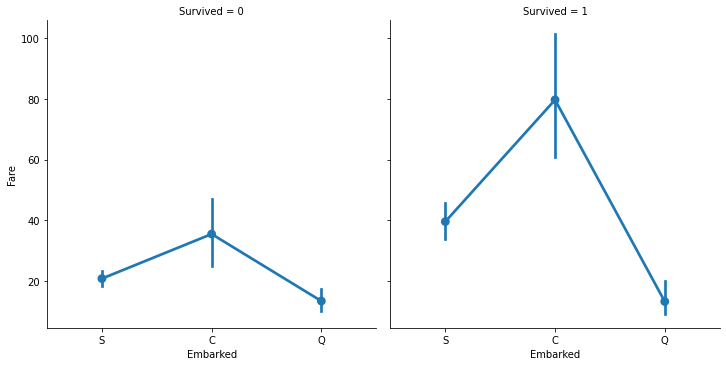

In [32]:
sns.catplot(x="Embarked", y="Fare", kind="point", col="Survived", data=df);

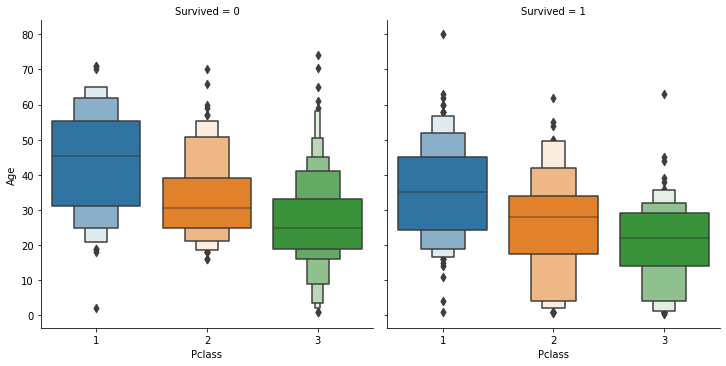

In [33]:
sns.catplot(x="Pclass", y="Age", kind="boxen", col="Survived", data=df);

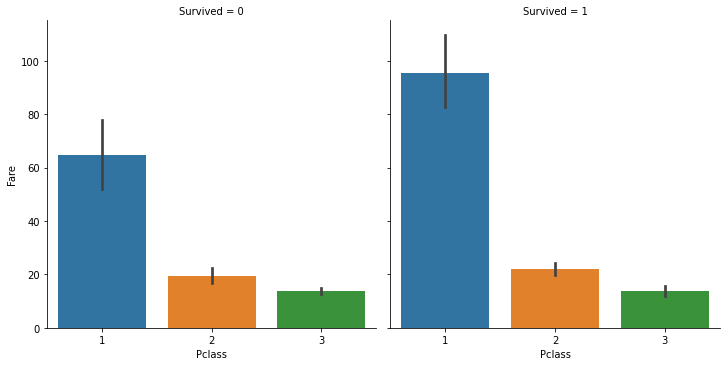

In [34]:
sns.catplot(x="Pclass", y="Fare", kind="bar", col="Survived", data=df);

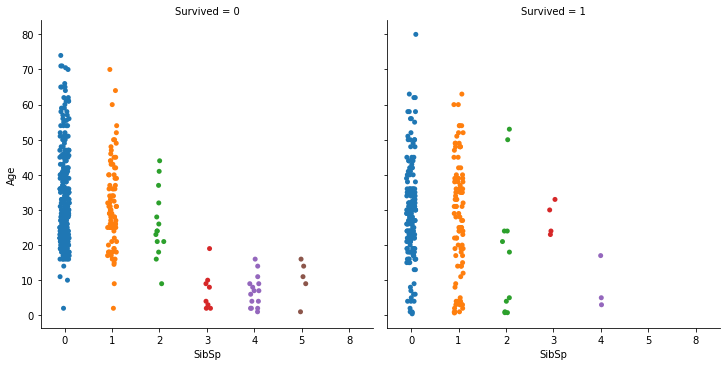

In [35]:
sns.catplot(x="SibSp", y="Age", kind="strip", col="Survived", data=df);

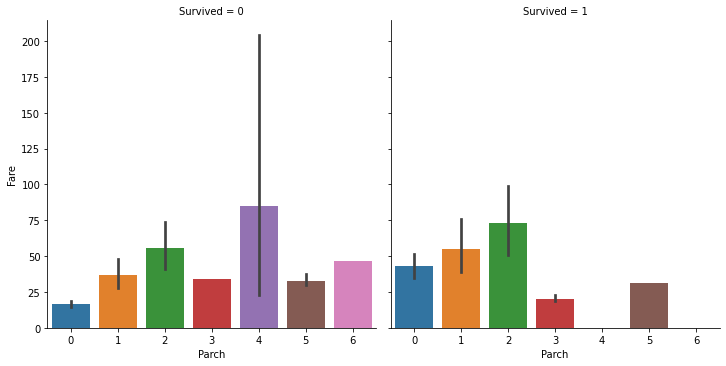

In [36]:
sns.catplot(x="Parch", y="Fare", kind="bar", col="Survived", data=df);

## 3.Preprocessing<a id="preprocess"></a>

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dropping Some Features

In [38]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

### Filling The Missing Data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [41]:
c = 0
for i in df.Embarked:
    if pd.isna(i):
        print(c)
    c+=1

61
829


In [42]:
df.Embarked.mode()

0    S
dtype: object

In [43]:
df.Embarked[61] = "S"
df.Embarked[829] = "S"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Categorical Variables To Dummy Variables

In [45]:
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


*In dummy variables, we can drop a column for every features*

In [46]:
df.drop(["Sex_male", "Embarked_C"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


### Train Data

In [47]:
X_train = df.drop("Survived", axis=1)
y_train = df[["Survived"]]

print(X_train.head())
print(y_train.head())

   Pclass   Age  SibSp  Parch     Fare  Sex_female  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500           0           0           1
1       1  38.0      1      0  71.2833           1           0           0
2       3  26.0      0      0   7.9250           1           0           1
3       1  35.0      1      0  53.1000           1           0           1
4       3  35.0      0      0   8.0500           0           0           1
   Survived
0         0
1         1
2         1
3         1
4         0


### Scaling

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.43279337, ...,  1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.4745452 , ...,  1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ...,  1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.73769513,
         3.25137334, -1.62380254]])

In [49]:
y_train = np.ravel(y_train)

### Test Data

In [50]:
def preprocess(data):
    
    print(data.head())
    print("\n\n")
    
    data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
    data.Age.fillna(df.Age.mean(), inplace=True)
    data.Fare.fillna(df.Fare.mean(), inplace=True)
    data = pd.get_dummies(data)
    data.drop(["Sex_male", "Embarked_C"], axis=1, inplace=True)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    
    print(data)
    return data

In [51]:
X_test = preprocess(test)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  



[[ 0.87348191  0.34428417 -0.49947002 ... -0.75592895  2.84375747
  -1.35067551]
 [ 0.87348191  1.33465451  0.61699237 ...  1.32287566 -0.35164743
   0.74037028]
 [-0.3158191

## 4.Modeling<a id="model"></a>

In [52]:
algorithms = [LogisticRegression, RidgeClassifier, SVC, LinearSVC, RandomForestClassifier, KNeighborsClassifier,
              GaussianNB, Perceptron, SGDClassifier, DecisionTreeClassifier]

In [53]:
def autoML(algorithm): 

    model = algorithm().fit(X_train, y_train)
    acc = model.score(X_train, y_train)
    model_name = algorithm.__name__
    
    print(f"Model Name: {model_name}\nTrain Accuracy: {acc}\n\n")

In [54]:
for alg in algorithms:
    
    autoML(alg)

Model Name: LogisticRegression
Train Accuracy: 0.8002244668911336


Model Name: RidgeClassifier
Train Accuracy: 0.7991021324354658


Model Name: SVC
Train Accuracy: 0.8462401795735129


Model Name: LinearSVC
Train Accuracy: 0.8002244668911336




/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Name: RandomForestClassifier
Train Accuracy: 0.9820426487093153


Model Name: KNeighborsClassifier
Train Accuracy: 0.8585858585858586


Model Name: GaussianNB
Train Accuracy: 0.7890011223344556


Model Name: Perceptron
Train Accuracy: 0.7283950617283951


Model Name: SGDClassifier
Train Accuracy: 0.7957351290684624


Model Name: DecisionTreeClassifier
Train Accuracy: 0.9820426487093153




### Tuning

In [55]:
model = RandomForestClassifier()

In [56]:
parameters = {'max_depth': [None, 10, 20, 50],
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [1, 2, 5],
             'n_estimators': [50, 100, 200, 400]}

In [57]:
cv_model = GridSearchCV(model, parameters, cv=5, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.81372795 0.80362187
 0.80922729 0.81148076 0.8238152  0.82270416 0.8249388  0.82717971
        nan        nan        nan        nan 0.83053794 0.82495135
 0.82608123 0.82720482 0.8182035  0.82606867 0.82270416 0.82607495
        nan        nan        nan        nan 0.82717971 0.82158684
 0.81597514 0.8148641  0.82384031 0.81708618 0.81822233 0.81709246
        nan        nan        nan        nan 0.81595003 0.81259808
 0.81819723 0.81260436 0.81706735 0.8182035  0.82942063 0.82943318
        nan        nan        nan        nan 0.82943946 0.81709246
 0.82717344 0.82719854 0.81596259 0.82270416 0.82719854 0.8294269
        nan        nan        nan        nan 0.82606867 0.81596887
 0.81823489 0.82158684 0.82269788 0.81935221 0.81934593 0.82158684
        nan        nan        nan        nan 0.80474546 0.

In [58]:
cv_model.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [61]:
tuned_model = RandomForestClassifier(max_depth=10, 
                                     max_features="log2",
                                     min_samples_leaf=2,
                                     min_samples_split=2,
                                     n_estimators=50).fit(X_train, y_train)

In [62]:
predictions = tuned_model.predict(X_test)
output = pd.DataFrame({'PassengerId': gender.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

### Helper Notebooks
* [Notebook 1](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Notebook 2](https://www.kaggle.com/meisamraz/titanic-classification-top-5#Titanic-Project-Classification)


### Sources
* [Scikit-learn](https://scikit-learn.org/stable/index.html)
* [Pandas](https://pandas.pydata.org/)
* [Seaborn](https://seaborn.pydata.org/)